In [18]:
import pandas as pd

# Load the CSV file into a DataFrame
#csv_file_path = r"C:\Users\Hp\Desktop\capstoneB\ev_stations.csv"  # Replace with your CSV file path
df = pd.read_csv('EV_STATIONS1.csv')

# Convert the 'Usage Cost' column to numeric, forcing errors to NaN
df['Usage Cost'] = pd.to_numeric(df['Usage Cost'], errors='coerce')

# Calculate the mean of the 'Usage Cost' column, excluding NaN values
mean_value = df['Usage Cost'].mean()

# Print the result
print(f"The mean of the 'Usage Cost' column is: {mean_value}")


The mean of the 'Usage Cost' column is: 0.2609090909090909


In [21]:
import csv
import os

# Define the original and cleaned CSV file paths
original_csv_file_path = "EV_STATIONS1.csv"
cleaned_csv_file_path = "ev_stations_cleaned.csv"

# Define the state mapping dictionary
state_mapping = {
    'VIC': 'Victoria',
    'AU-VIC': 'Victoria',
    'Vic': 'Victoria',
    'vic': 'Victoria',
    'City of Ballarat': 'Victoria',
    'Victoria': 'Victoria',
    'Western Australia': 'Western Australia',
    'Western Autralia': 'Western Australia',
    'western australia': 'Western Australia',
    'WA': 'Western Australia',
    'wa': 'Western Australia',
    'South Australia': 'South Australia',
    'SA': 'South Australia',
    'sa': 'South Australia',
    'Pastoral Unincorporated Area': 'South Australia',
    'The District Council of Streaky Bay': 'South Australia',
    'QLD':'QueensLand',
    'qld':'QueensLand',
    'Qld':'QueensLand',
    'Queensland':'QueensLand',
    'tasmania': 'Tasmania',
    'Tasmania': 'Tasmania',
    'TAS': 'Tasmania',
    'Tas': 'Tasmania',
    'Liverpool City Council': 'New South Wales',
    'nsw': 'New South Wales',
    'Nsw': 'New South Wales',
    'NSW': 'New South Wales',
    'Northern Beaches Council': 'New South Wales',
    'ACT': 'Australian Capital Territory',
    'Australian Capital Territory': 'Australian Capital Territory',

}

# Open the original CSV file for reading and the cleaned CSV file for writing
with open(original_csv_file_path, mode='r', newline='', encoding='utf-8') as original_csv_file:
    with open(cleaned_csv_file_path, mode='w', newline='', encoding='utf-8') as cleaned_csv_file:
        csv_reader = csv.reader(original_csv_file)
        csv_writer = csv.writer(cleaned_csv_file)

        # Read the header and write it to the cleaned CSV file
        header = next(csv_reader)
        csv_writer.writerow(header)

        # Iterate through each row in the original CSV file
        for row in csv_reader:
            state = row[3]  # Assuming 'StateOrProvince' is the 4th column (index 3)

            # Standardize the state name using the state mapping dictionary
            standardized_state = state_mapping.get(state, state)  # Default to original if not in mapping
            row[3] = standardized_state

            # Write the cleaned row to the new CSV file
            csv_writer.writerow(row)

print(f"Cleaned data saved successfully to: {cleaned_csv_file_path}")


Cleaned data saved successfully to: ev_stations_cleaned.csv


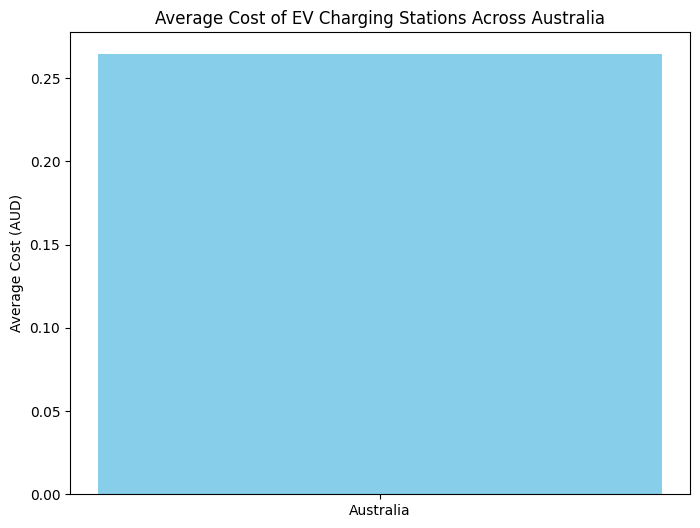

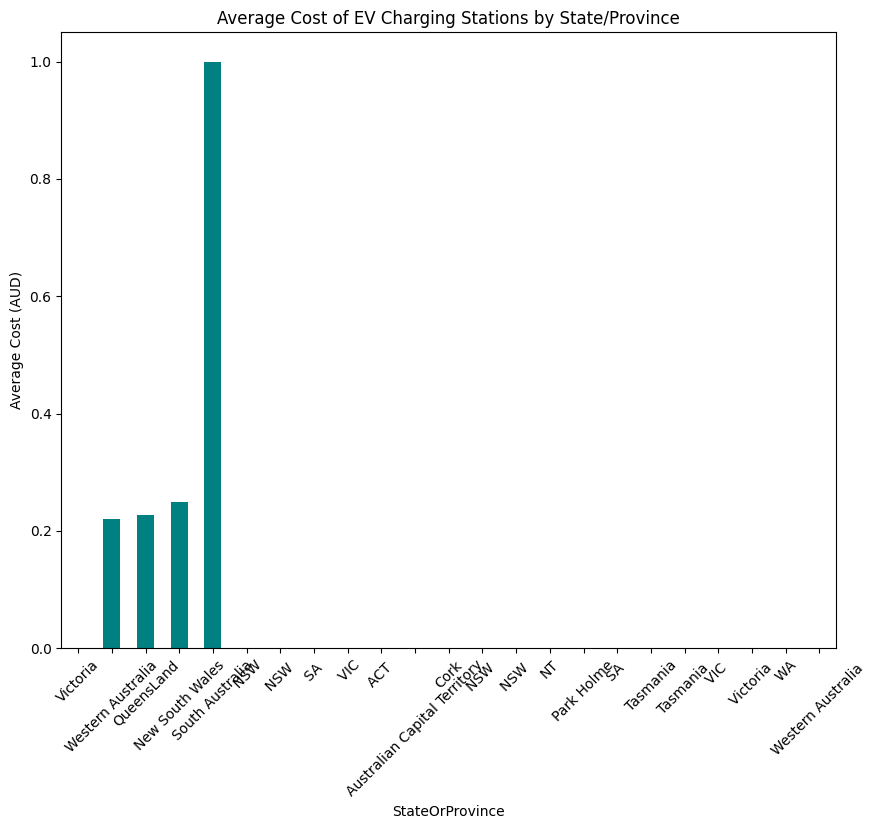

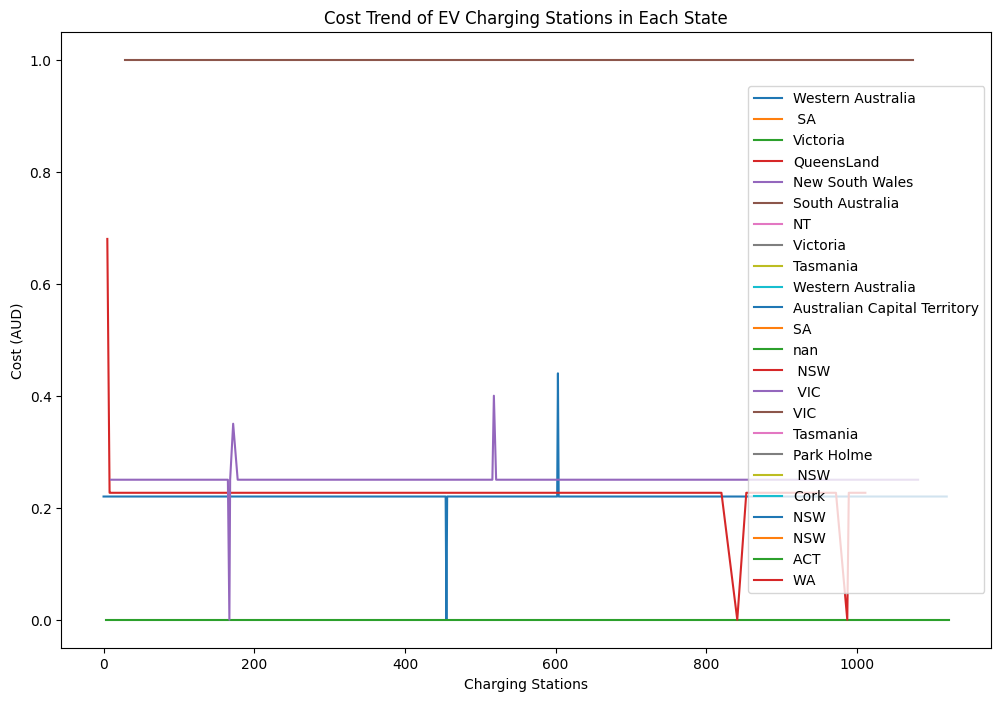

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame

df = pd.read_csv("ev_stations_cleaned.csv")

# Convert the 'Usage Cost' to numeric, forcing errors to NaN
df['Usage Cost'] = pd.to_numeric(df['Usage Cost'], errors='coerce')

# Fill NaN values with the mean 'Usage Cost' of the respective state
df['Usage Cost'] = df.groupby('StateOrProvince')['Usage Cost'].transform(lambda x: x.fillna(x.mean()))

# 1. Average Cost Across Australia
average_cost_aus = df['Usage Cost'].mean()

plt.figure(figsize=(8, 6))
plt.bar('Australia', average_cost_aus, color='skyblue')
plt.ylabel('Average Cost (AUD)')
plt.title('Average Cost of EV Charging Stations Across Australia')
plt.show()

# 2. Average Cost Grouped by States/Provinces
average_cost_by_state = df.groupby('StateOrProvince')['Usage Cost'].mean().sort_values()

plt.figure(figsize=(10, 8))
average_cost_by_state.plot(kind='bar', color='teal')
plt.ylabel('Average Cost (AUD)')
plt.title('Average Cost of EV Charging Stations by State/Province')
plt.xticks(rotation=45)
plt.show()

# 3. Cost Trend in Each State
plt.figure(figsize=(12, 8))
for state in df['StateOrProvince'].unique():
    state_data = df[df['StateOrProvince'] == state]
    plt.plot(state_data.index, state_data['Usage Cost'], label=state)

plt.ylabel('Cost (AUD)')
plt.xlabel('Charging Stations')
plt.title('Cost Trend of EV Charging Stations in Each State')
plt.legend()
plt.show()
